In [254]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings("ignore")

### 1. EDA

In [255]:
# data = pd.read_csv('../data/MRI_data_0.csv')
data =  pd.read_csv('../data/ANMerge_MRI_FS5.3_under_90.csv')
data.drop_duplicates(inplace=True)
data['Subject_ID'] =  data['Key'].apply(lambda x: x.split('_')[0])

In [256]:
print(data.shape)
data.head()

(1050, 148)


,Key,Visit,Month,Site,Diagnosis,Sex,Age,APOE,MMSE,lh_bankssts_thickness,...,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol,Subject_ID
0,KPOADC001_1,1.0,0.0,Kuopio,AD,Female,86.0,E4E4,20.0,2.224,...,760261.7818,757058.0,1361906.0,0.664587,0.977432,24.0,13.0,37.0,1393350.752,KPOADC001
1,KPOADC001_2,2.0,3.0,Kuopio,AD,Female,86.0,E4E4,16.0,2.140,...,759630.3006,756220.0,1319352.0,0.659338,0.941138,23.0,17.0,40.0,1401868.831,KPOADC001
2,KPOADC001_5,5.0,12.0,Kuopio,AD,Female,87.0,E4E4,21.0,2.248,...,756965.4707,753356.0,1342921.0,0.660968,0.959201,30.0,24.0,54.0,1400041.258,KPOADC001
3,KPOADC002_1,1.0,0.0,Kuopio,AD,Female,68.0,E4E4,26.0,1.971,...,826027.5631,824742.0,1515148.0,0.652202,0.976865,22.0,21.0,43.0,1551030.924,KPOADC002
4,KPOADC002_2,2.0,3.0,Kuopio,AD,Female,68.0,E4E4,25.0,2.066,...,814547.9697,813231.0,1508917.0,0.643059,0.968317,20.0,9.0,29.0,1558288.189,KPOADC002


In [257]:
len(set(data['Subject_ID']))

## Out of 1050 entries, there are 381 distinct patients.

381

In [258]:
data.sort_values('Month', ascending=False).groupby('Subject_ID').head(1)

,Key,Visit,Month,Site,Diagnosis,Sex,Age,APOE,MMSE,lh_bankssts_thickness,...,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol,Subject_ID
636,LNDCTL040_3,3.0,24.0,London,CTL,Female,87.0,E3E3,29.0,2.343,...,870597.1770,867686.0,1539579.0,0.682366,0.978866,46.0,45.0,91.0,1572818.838,LNDCTL040
632,LNDCTL023_3,3.0,24.0,London,CTL,Female,73.0,E2E3,29.0,2.336,...,911251.7096,909131.0,1432497.0,0.733901,1.009384,13.0,14.0,27.0,1419179.889,LNDCTL023
651,LNDCTL045_3,3.0,24.0,London,CTL,Male,73.0,E3E4,28.0,2.294,...,961662.9604,959703.0,1617750.0,0.713079,1.017007,16.0,21.0,37.0,1590696.922,LNDCTL045
564,LNDCTL003_3,3.0,24.0,London,CTL,Male,86.0,E3E3,27.0,2.061,...,865759.4535,862900.0,1462466.0,0.717476,1.037318,43.0,38.0,81.0,1409853.575,LNDCTL003
611,LNDCTL005_3,3.0,24.0,London,CTL,Male,75.0,E2E3,29.0,2.056,...,881323.8420,879221.0,1637284.0,0.639146,0.963937,87.0,78.0,165.0,1698537.845,LNDCTL005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,THSMCI036_1,1.0,0.0,Thessaloniki,MCI,Female,79.0,E3E3,26.0,2.146,...,735092.9255,733267.0,1277610.0,0.694201,0.970070,104.0,67.0,171.0,1317028.276,THSMCI036
1157,THSMCI040_1,1.0,0.0,Thessaloniki,MCI,Female,68.0,E3E4,28.0,2.132,...,821744.3126,820444.0,1303843.0,0.725317,0.990233,10.0,11.0,21.0,1316703.455,THSMCI040
397,LDZADC004_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.411,...,925358.7112,921000.0,1563865.0,0.700495,0.991634,63.0,64.0,127.0,1577059.363,LDZADC004
1009,THSADC023_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.970,...,801153.9087,797260.0,1467879.0,0.646772,0.942215,47.0,49.0,96.0,1557902.542,THSADC023


Text(0.5, 1.0, 'Nan value percentage')

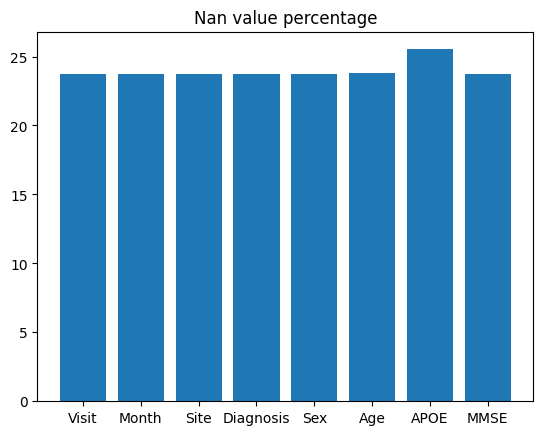

In [259]:
nan_values_pct = data.isna().sum() / len(data) * 100
plt.bar(nan_values_pct[nan_values_pct>=1].index, nan_values_pct[nan_values_pct>=1])
plt.title('Nan value percentage')

In [260]:
data['Visit'] = data['Key'].apply(lambda x: x.split('_')[1])

In [261]:
data.drop(columns = ['Month'], inplace = True)

In [262]:
data = data.sort_values(by=['Subject_ID', 'Visit'])

# Fill NaN using the last known value of 'feature' per 'subject_id'
data['Site'] = data.groupby('Subject_ID')['Site'].fillna(method='ffill')

In [263]:
data['Diagnosis'] = data.groupby('Subject_ID')['Diagnosis'].fillna(method='ffill')
data['Sex'] = data.groupby('Subject_ID')['Sex'].fillna(method='ffill')
data['APOE'] = data.groupby('Subject_ID')['APOE'].fillna(method='ffill')

In [264]:
data['Age'] = data.groupby('Subject_ID')['Age'].transform(lambda x: x.fillna(x.max()))
data['MMSE'] = data.groupby('Subject_ID')['MMSE'].transform(lambda x: x.fillna(x.min()))


Text(0.5, 1.0, 'Nan value percentage')

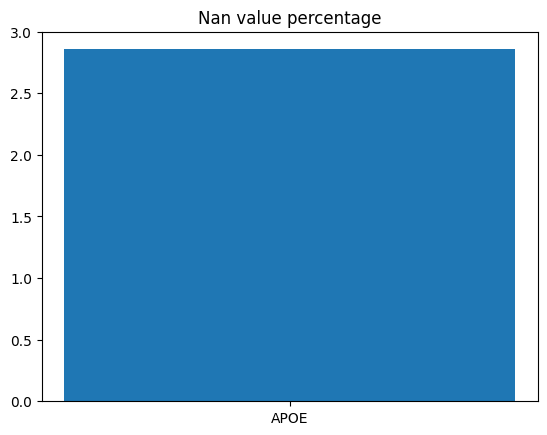

In [265]:
nan_values_pct = data.isna().sum() / len(data) * 100
plt.bar(nan_values_pct[nan_values_pct>=1].index, nan_values_pct[nan_values_pct>=1])
plt.title('Nan value percentage')

In [266]:
data.shape

(1050, 147)

In [267]:
## remove index
data = data.dropna().reset_index(drop = True)

In [268]:
data.isna().sum().sum()

0

In [269]:
data

,Key,Visit,Site,Diagnosis,Sex,Age,APOE,MMSE,lh_bankssts_thickness,rh_bankssts_thickness,...,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol,Subject_ID
0,KPOADC001_1,1,Kuopio,AD,Female,86.0,E4E4,20.0,2.224,2.249,...,760261.7818,757058.0,1361906.0,0.664587,0.977432,24.0,13.0,37.0,1393350.752,KPOADC001
1,KPOADC001_2,2,Kuopio,AD,Female,86.0,E4E4,16.0,2.140,2.092,...,759630.3006,756220.0,1319352.0,0.659338,0.941138,23.0,17.0,40.0,1401868.831,KPOADC001
2,KPOADC001_5,5,Kuopio,AD,Female,87.0,E4E4,21.0,2.248,2.343,...,756965.4707,753356.0,1342921.0,0.660968,0.959201,30.0,24.0,54.0,1400041.258,KPOADC001
3,KPOADC002_1,1,Kuopio,AD,Female,68.0,E4E4,26.0,1.971,2.018,...,826027.5631,824742.0,1515148.0,0.652202,0.976865,22.0,21.0,43.0,1551030.924,KPOADC002
4,KPOADC002_2,2,Kuopio,AD,Female,68.0,E4E4,25.0,2.066,2.112,...,814547.9697,813231.0,1508917.0,0.643059,0.968317,20.0,9.0,29.0,1558288.189,KPOADC002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,TLSMCI607_1,1,Toulouse,MCI,Female,72.0,E3E3,29.0,2.077,2.212,...,758853.9467,756265.0,1291996.0,0.694822,1.009026,20.0,14.0,34.0,1280438.726,TLSMCI607
1005,TLSMCI607_1.5,1.5,Toulouse,MCI,Female,72.0,E3E3,29.0,2.128,2.249,...,752913.2442,751888.0,1254851.0,0.697605,0.990604,17.0,16.0,33.0,1266753.178,TLSMCI607
1006,TLSMCI608_1,1,Toulouse,MCI,Male,73.0,E3E3,28.0,2.146,2.179,...,799621.9424,797171.0,1410540.0,0.684031,1.032691,35.0,29.0,64.0,1365887.517,TLSMCI608
1007,TLSMCI608_1.5,1.5,Toulouse,MCI,Male,73.0,E3E3,28.0,2.068,2.183,...,803357.3269,801129.0,1428442.0,0.685443,1.044901,39.0,34.0,73.0,1367059.954,TLSMCI608


In [270]:
def label_encode(data):
    #label encode categorical data
    categorical_columns = data.select_dtypes(include='object').columns
    #drop the Subject_ID column and PCA columns from the categorical columns
    if 'Key' in categorical_columns:
        categorical_columns = categorical_columns.drop('Key')
    if 'Subject_ID' in categorical_columns:
        categorical_columns = categorical_columns.drop(['Subject_ID'])
    #encode categorical data but print the mapping
    for column in categorical_columns:
        print(column)
        data[column], mapping_index = data[column].factorize()
        print(mapping_index)
    return data

In [271]:
label_encode(data)

Visit
Index(['1', '2', '5', '1.5', '6', '3'], dtype='object')
Site
Index(['Kuopio', 'Lodz', 'London', 'Perugia', 'Thessaloniki', 'Toulouse'], dtype='object')
Diagnosis
Index(['AD', 'CTL', 'MCI'], dtype='object')
Sex
Index(['Female', 'Male'], dtype='object')
APOE
Index(['E4E4', 'E3E3', 'E3E4', 'E2E3', 'E2E4', 'E2E2'], dtype='object')


,Key,Visit,Site,Diagnosis,Sex,Age,APOE,MMSE,lh_bankssts_thickness,rh_bankssts_thickness,...,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol,Subject_ID
0,KPOADC001_1,0,0,0,0,86.0,0,20.0,2.224,2.249,...,760261.7818,757058.0,1361906.0,0.664587,0.977432,24.0,13.0,37.0,1393350.752,KPOADC001
1,KPOADC001_2,1,0,0,0,86.0,0,16.0,2.140,2.092,...,759630.3006,756220.0,1319352.0,0.659338,0.941138,23.0,17.0,40.0,1401868.831,KPOADC001
2,KPOADC001_5,2,0,0,0,87.0,0,21.0,2.248,2.343,...,756965.4707,753356.0,1342921.0,0.660968,0.959201,30.0,24.0,54.0,1400041.258,KPOADC001
3,KPOADC002_1,0,0,0,0,68.0,0,26.0,1.971,2.018,...,826027.5631,824742.0,1515148.0,0.652202,0.976865,22.0,21.0,43.0,1551030.924,KPOADC002
4,KPOADC002_2,1,0,0,0,68.0,0,25.0,2.066,2.112,...,814547.9697,813231.0,1508917.0,0.643059,0.968317,20.0,9.0,29.0,1558288.189,KPOADC002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,TLSMCI607_1,0,5,2,0,72.0,1,29.0,2.077,2.212,...,758853.9467,756265.0,1291996.0,0.694822,1.009026,20.0,14.0,34.0,1280438.726,TLSMCI607
1005,TLSMCI607_1.5,3,5,2,0,72.0,1,29.0,2.128,2.249,...,752913.2442,751888.0,1254851.0,0.697605,0.990604,17.0,16.0,33.0,1266753.178,TLSMCI607
1006,TLSMCI608_1,0,5,2,1,73.0,1,28.0,2.146,2.179,...,799621.9424,797171.0,1410540.0,0.684031,1.032691,35.0,29.0,64.0,1365887.517,TLSMCI608
1007,TLSMCI608_1.5,3,5,2,1,73.0,1,28.0,2.068,2.183,...,803357.3269,801129.0,1428442.0,0.685443,1.044901,39.0,34.0,73.0,1367059.954,TLSMCI608


#### Count Plots for Diagnosis and Gender

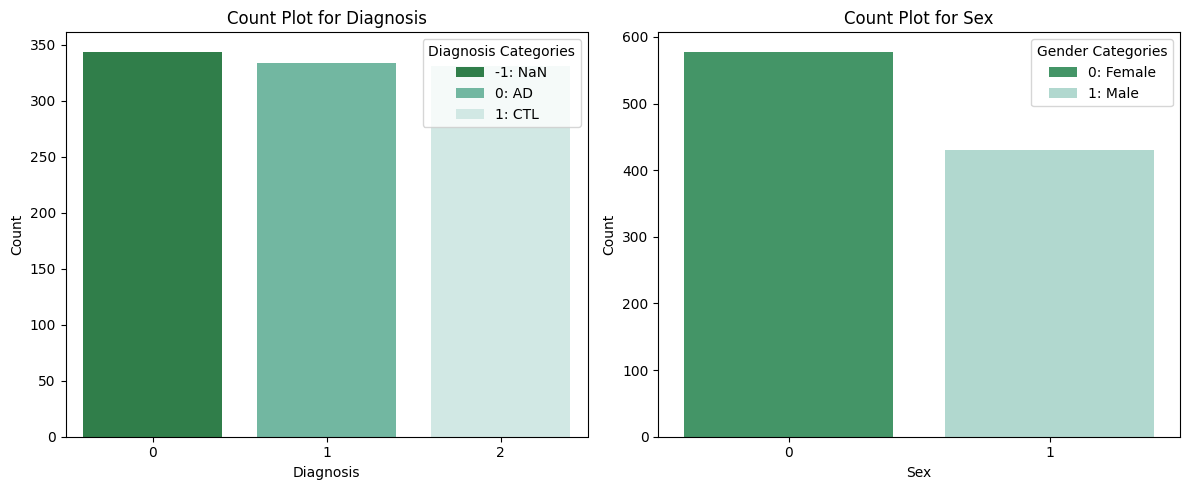

In [272]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot for 'Diagnosis' with legend
diagnosis_plot = sns.countplot(x='Diagnosis', data=data, palette="BuGn_r", ax=axes[0])
diagnosis_plot.set_title('Count Plot for Diagnosis')
diagnosis_plot.set_xlabel('Diagnosis')
diagnosis_plot.set_ylabel('Count')
# Manually defining legend labels for 'Diagnosis' categories
diagnosis_labels = ['-1: NaN','0: AD', '1: CTL', '2: MCI']
diagnosis_legend = axes[0].legend(title='Diagnosis Categories', loc='upper right', labels=diagnosis_labels)

# Count plot for 'Sex' with legend
sex_plot = sns.countplot(x='Sex', data=data, palette="BuGn_r", ax=axes[1])
sex_plot.set_title('Count Plot for Sex')
sex_plot.set_xlabel('Sex')
sex_plot.set_ylabel('Count')
# Manually defining legend labels for 'Sex' categories, assuming 0 and 1 correspond to different genders
sex_labels = ['0: Female', '1: Male']
sex_legend = axes[1].legend(title='Gender Categories', loc='upper right', labels=sex_labels)

plt.tight_layout()
plt.show()


Count Plot for Diagnosis: This plot illustrates the distribution of different diagnosis categories across the dataset. Each bar represents the count of observations for each diagnosis category.



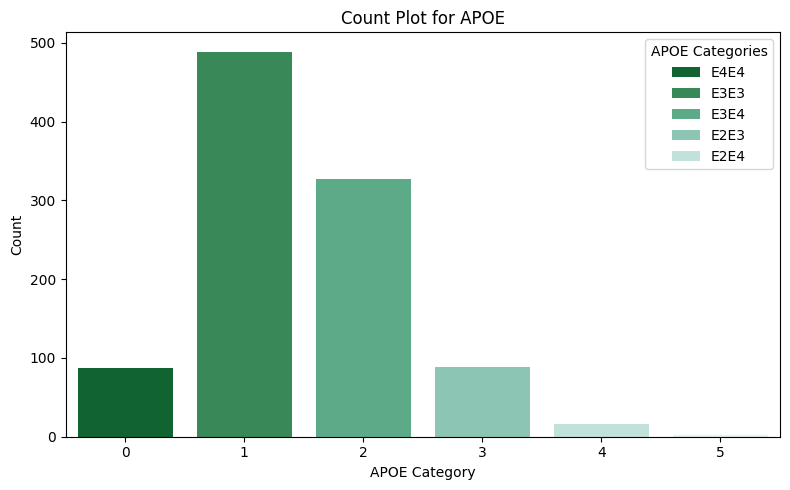

In [273]:
# Adjusting figure size for a single plot
plt.figure(figsize=(8, 5))

# Count plot for 'APOE'
apoe_plot = sns.countplot(x='APOE', data=data, palette="BuGn_r")
apoe_plot.set_title('Count Plot for APOE')
apoe_plot.set_xlabel('APOE Category')
apoe_plot.set_ylabel('Count')
# Assuming 'APOE' categories are numeric starting from 0, generating labels based on unique values
apoe_categories = data['APOE'].unique()
apoe_labels = ['E4E4', 'E3E3', 'E3E4', 'E2E3', 'E2E4']
apoe_legend = apoe_plot.legend(title='APOE Categories', loc='upper right', labels=apoe_labels)

plt.tight_layout()
plt.show()


#### Histogram for Age and MMSE

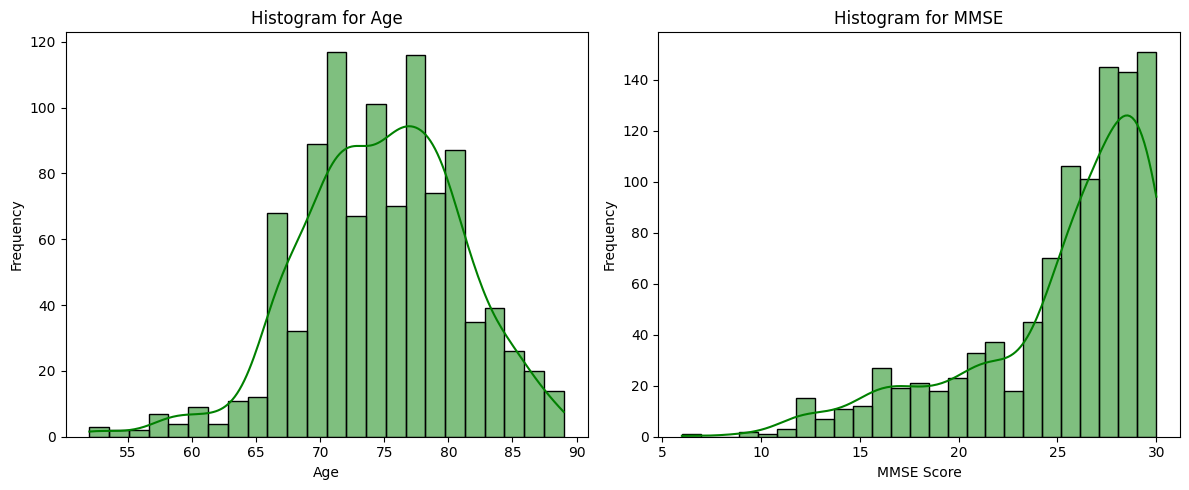

In [274]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for 'Age'
sns.histplot(data=data, x='Age', kde=True, color="green", ax=axes[0])
axes[0].set_title('Histogram for Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Histogram for 'MMSE'
sns.histplot(data=data, x='MMSE', kde=True, color="green", ax=axes[1])
axes[1].set_title('Histogram for MMSE')
axes[1].set_xlabel('MMSE Score')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Histogram for Age: This plot shows the distribution of ages within the dataset. The shape of the distribution is roughly normal, indicating a range of ages among the subjects.

Histogram for MMSE: The plot for MMSE scores shows the distribution of cognitive scores among the subjects. The distribution seems to be multimodal, indicating the presence of various subgroups within the dataset.

#### Distribution Analysis

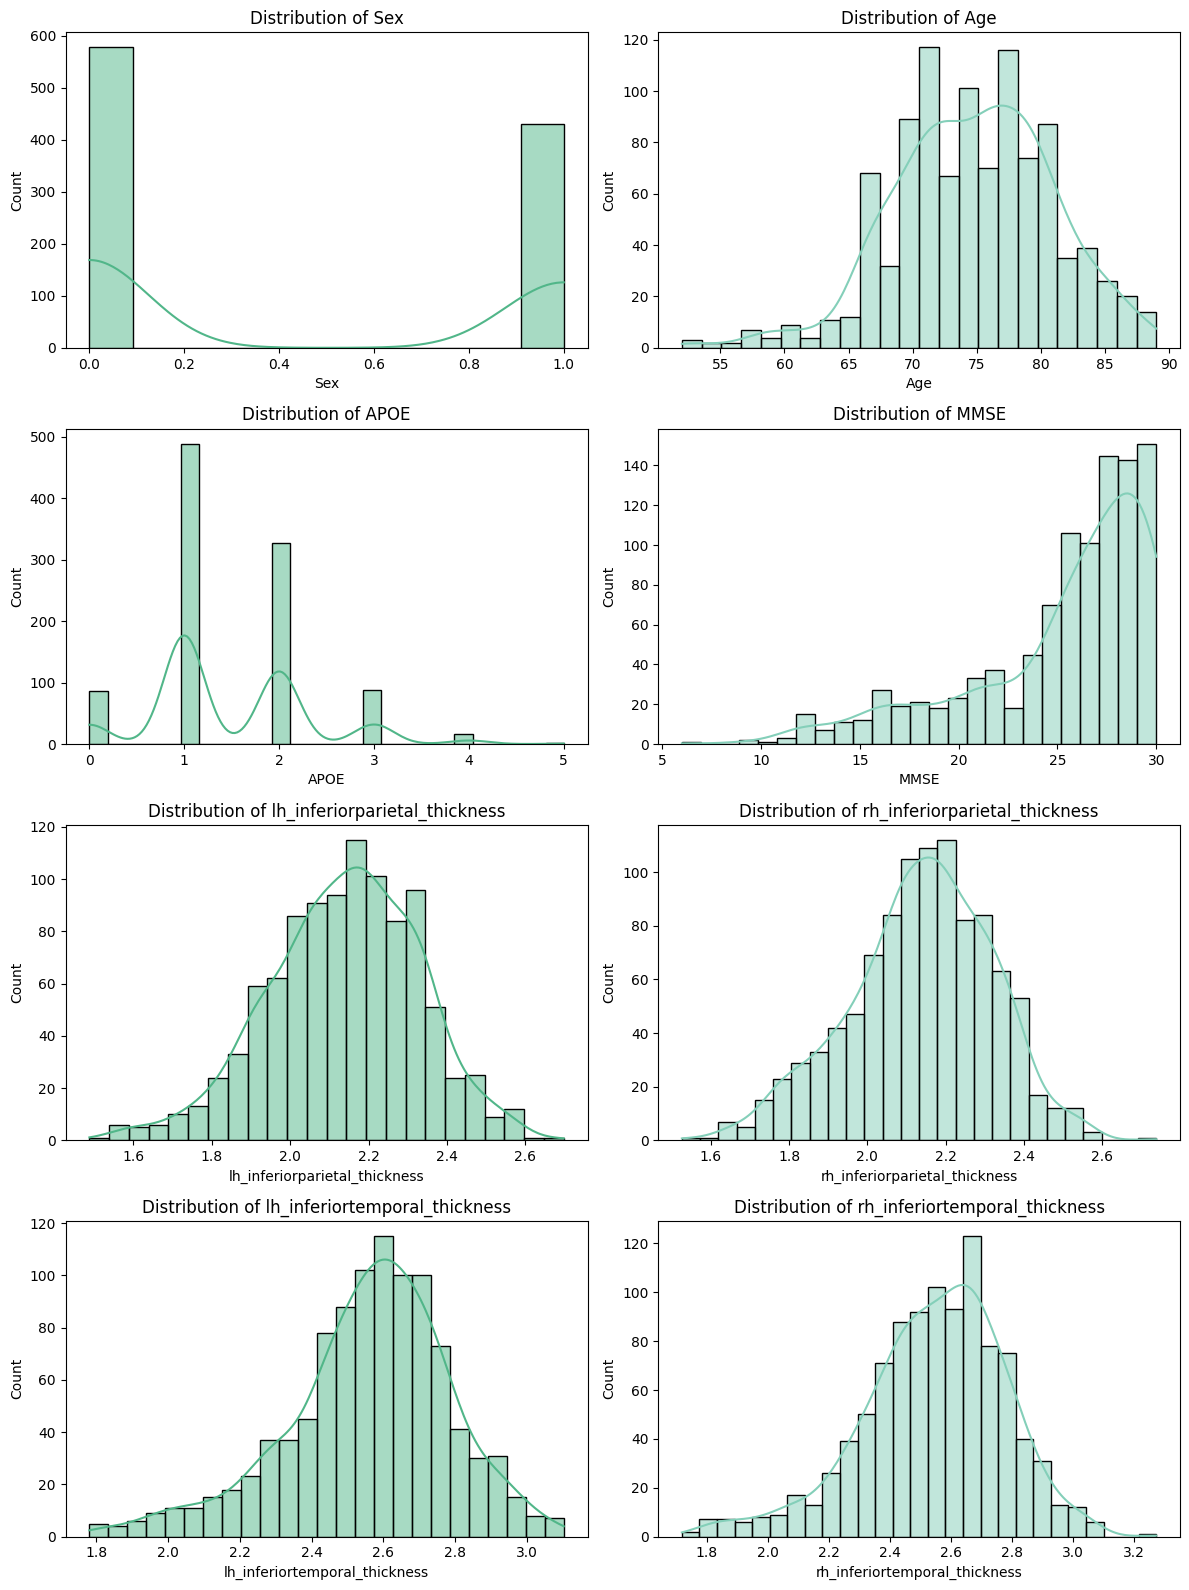

In [275]:
# Adjusting the analysis to ensure we're dealing with numeric columns for histograms and boxplots
extended_subset_columns = ['Diagnosis', 'Sex', 'Age', 'APOE', 'MMSE'] + list(data.columns[20:50])  # Selecting a broader range of columns
extended_data_subset = data[extended_subset_columns]
color_palette = "BuGn_r"

# Re-checking the data types to ensure we select numeric columns
numeric_columns = extended_data_subset.select_dtypes(include=[np.number]).columns.tolist()

# Updating the figure to plot only numeric data
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Histogram and boxplot for a numeric feature
for i, col in enumerate(numeric_columns[1:9]):  # Skipping 'Diagnosis' which is at index 0
    row, col_num = divmod(i, 2)
    sns.histplot(data=extended_data_subset, x=col, kde=True, color=sns.color_palette(color_palette)[col_num + 2], ax=axes[row, col_num])
    axes[row, col_num].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


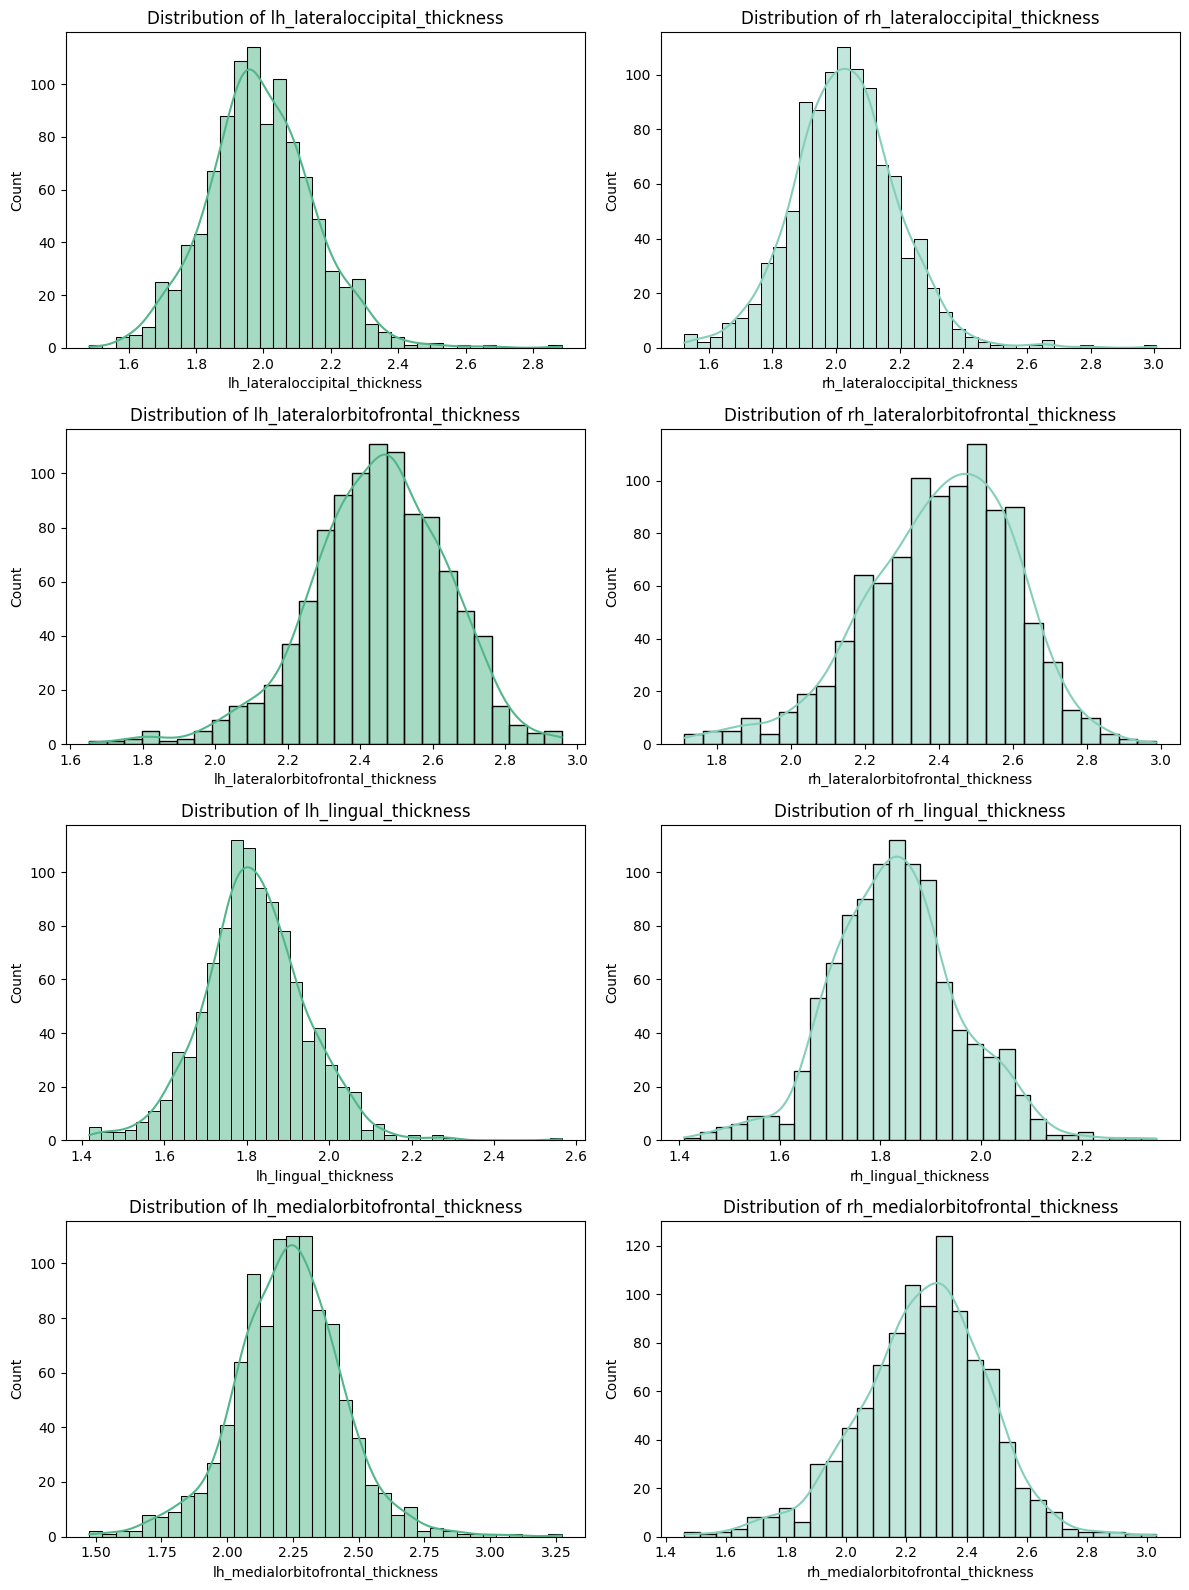

In [276]:
# Updating the figure to plot only numeric data
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Histogram and boxplot for a numeric feature
for i, col in enumerate(numeric_columns[11:19]):  # Skipping 'Diagnosis' which is at index 0
    row, col_num = divmod(i, 2)
    sns.histplot(data=extended_data_subset, x=col, kde=True, color=sns.color_palette(color_palette)[col_num + 2], ax=axes[row, col_num])
    axes[row, col_num].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

#### Analysis of Left Hemishpere Features

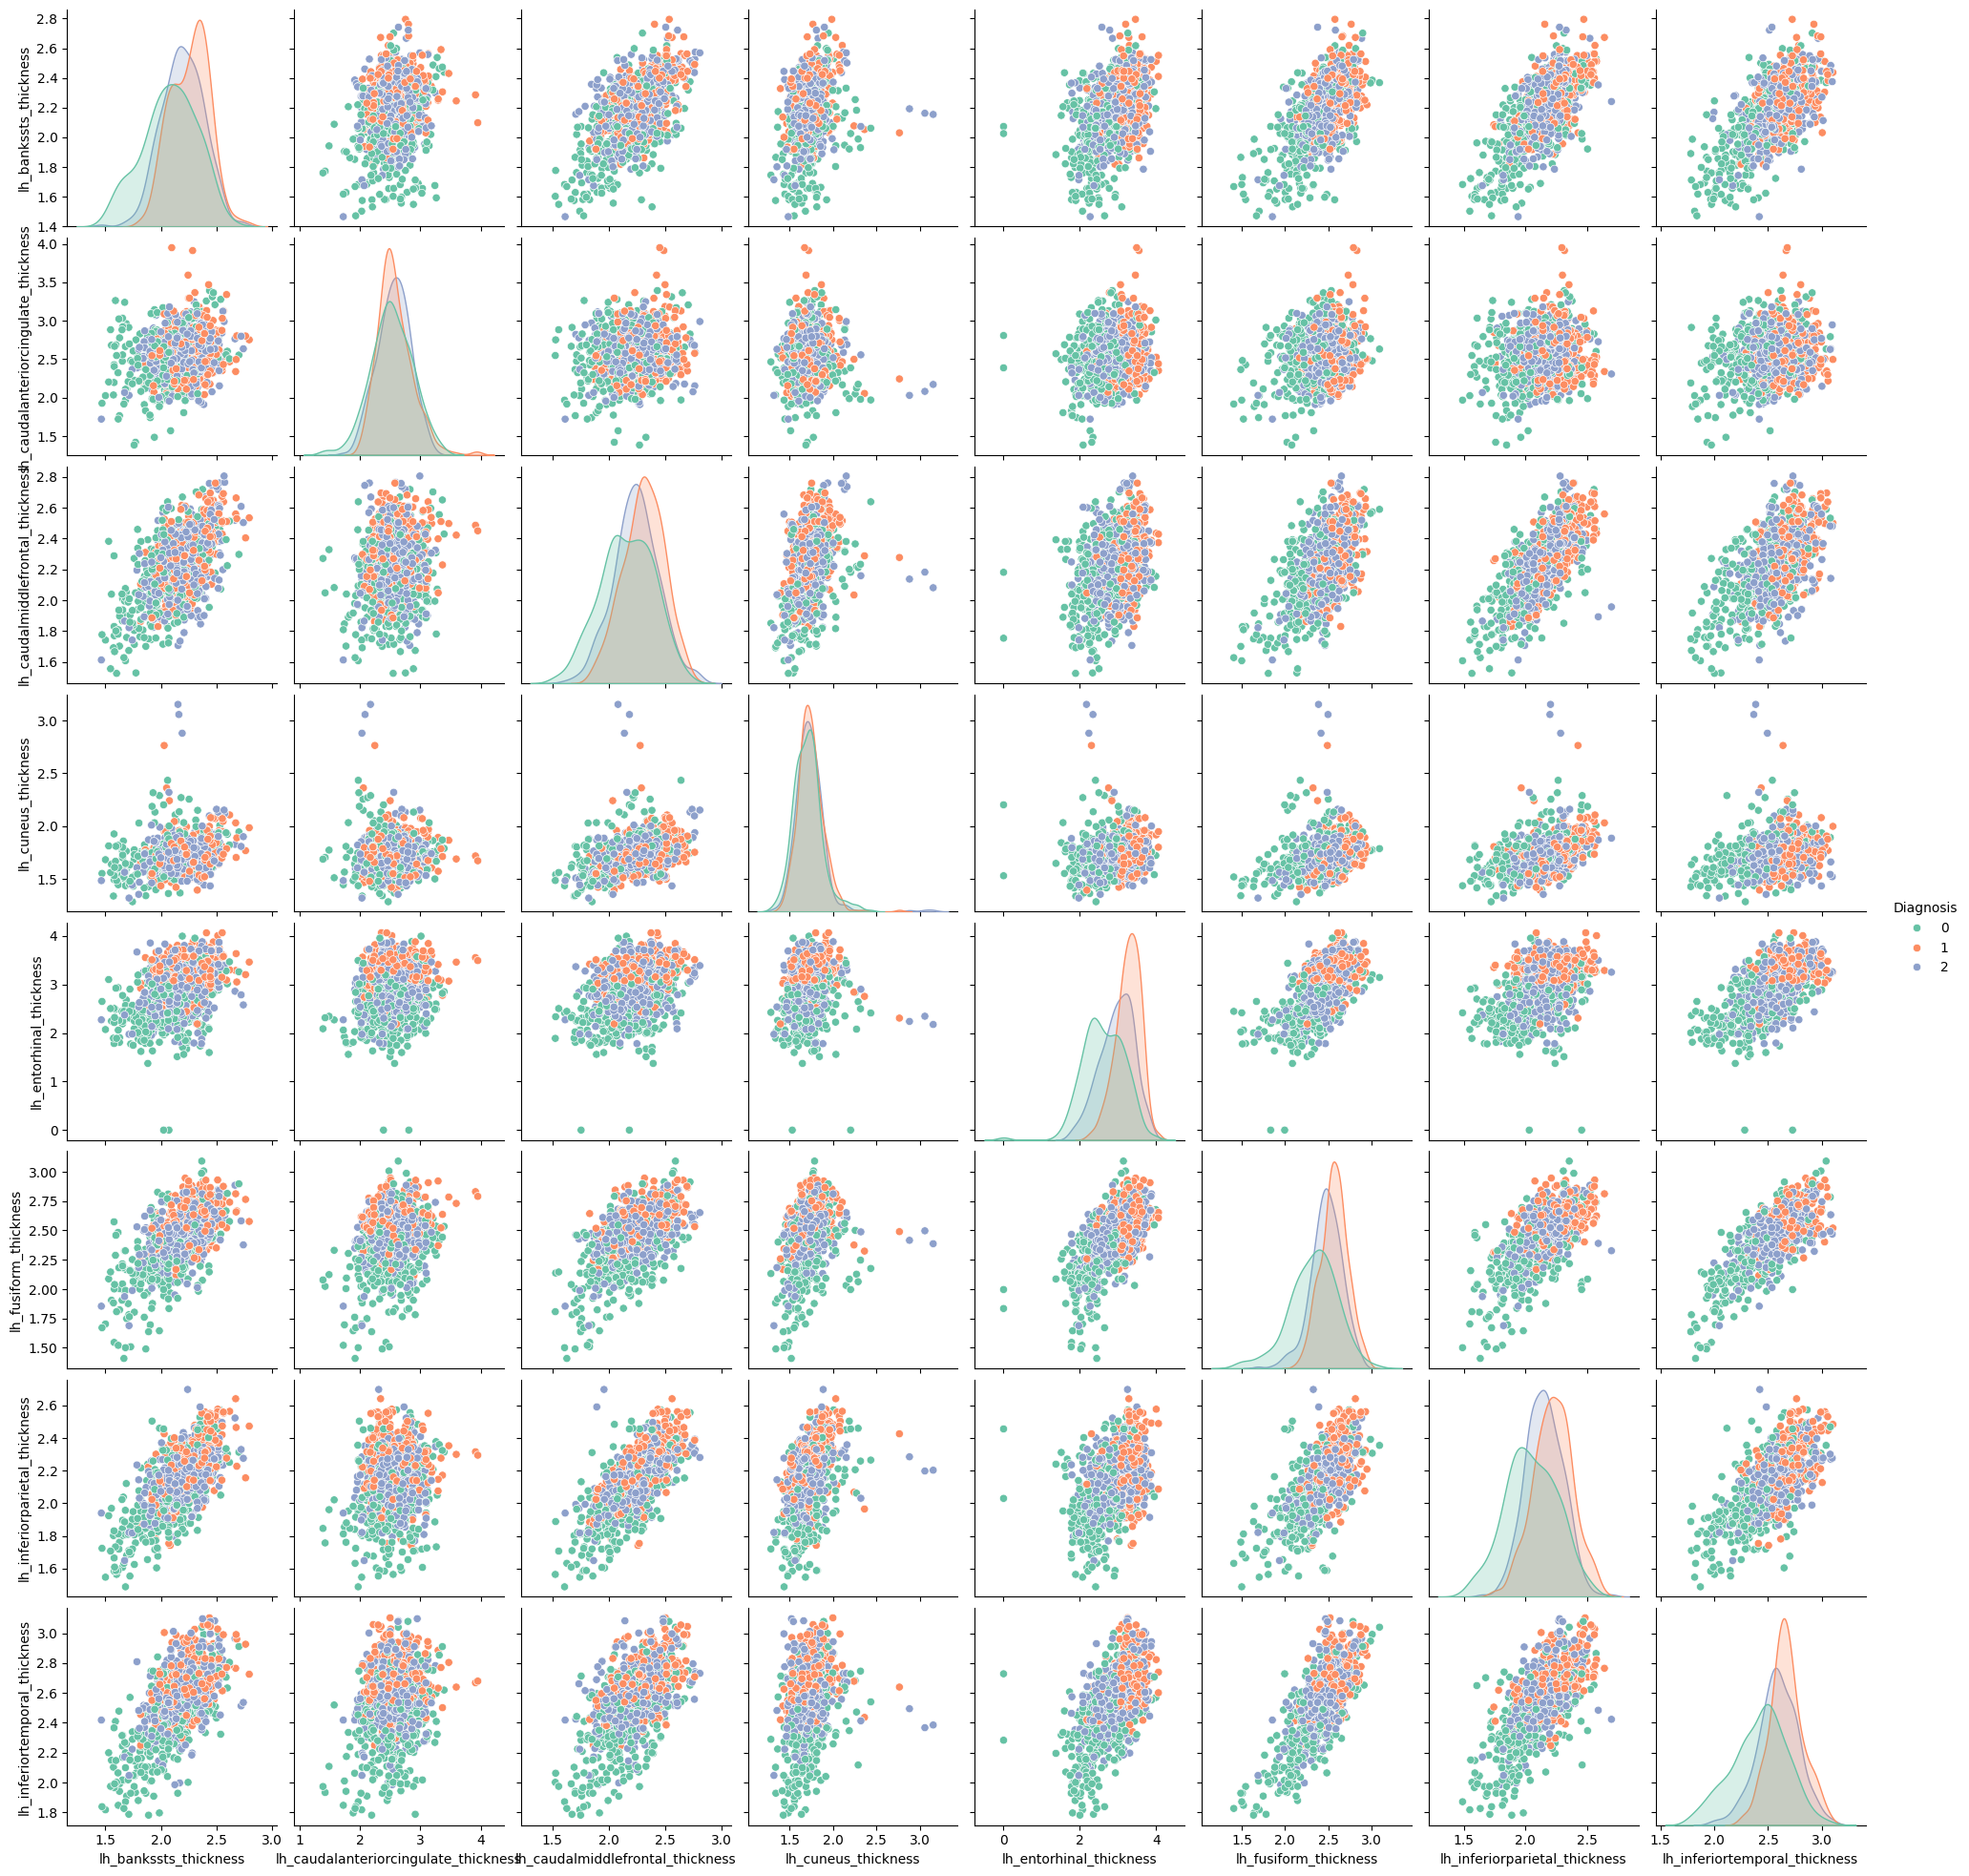

In [277]:
# Selecting features that start with 'lh_' for pair plots, along with 'Diagnosis'
lh_columns = [col for col in data.columns if col.startswith('lh_')]
pair_plot_data = data[['Diagnosis'] + lh_columns]

# Due to the large number of 'lh_' features, plotting all of them in a pair plot may not be feasible.
# For demonstration, let's select the first 5 'lh_' features to keep the pair plot readable.
pair_plot_data = pair_plot_data[['Diagnosis'] + lh_columns[:8]]

# Creating pair plots
sns.pairplot(pair_plot_data, hue='Diagnosis', palette='Set2')
plt.show()


In [278]:
 lh_columns[:8]

['lh_bankssts_thickness',
 'lh_caudalanteriorcingulate_thickness',
 'lh_caudalmiddlefrontal_thickness',
 'lh_cuneus_thickness',
 'lh_entorhinal_thickness',
 'lh_fusiform_thickness',
 'lh_inferiorparietal_thickness',
 'lh_inferiortemporal_thickness']

#### Swarm Plots for Geneotype

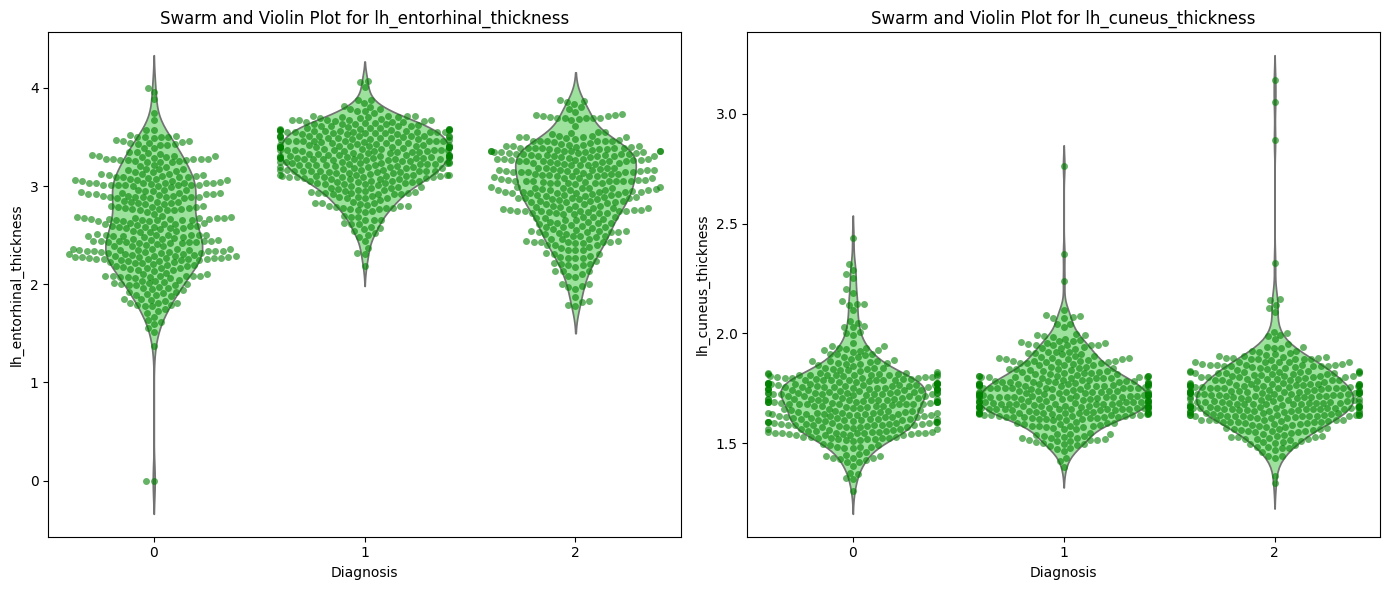

In [279]:
pc_columns = ['Diagnosis', 'lh_entorhinal_thickness', 'lh_cuneus_thickness']

# Creating Swarm and Violin plots for PC1 and PC2 against Diagnosis
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.swarmplot(x='Diagnosis', y='lh_entorhinal_thickness', data=data[pc_columns], ax=axes[0], color='green', alpha=0.6)
sns.violinplot(x='Diagnosis', y='lh_entorhinal_thickness', data=data[pc_columns], ax=axes[0], inner=None, color='lightgreen')

sns.swarmplot(x='Diagnosis', y='lh_cuneus_thickness', data=data[pc_columns], ax=axes[1], color='green', alpha=0.6)
sns.violinplot(x='Diagnosis', y='lh_cuneus_thickness', data=data[pc_columns], ax=axes[1], inner=None, color='lightgreen')


axes[0].set_title('Swarm and Violin Plot for lh_entorhinal_thickness')
axes[1].set_title('Swarm and Violin Plot for lh_cuneus_thickness')

plt.tight_layout()
plt.show()

#### Correlation Map

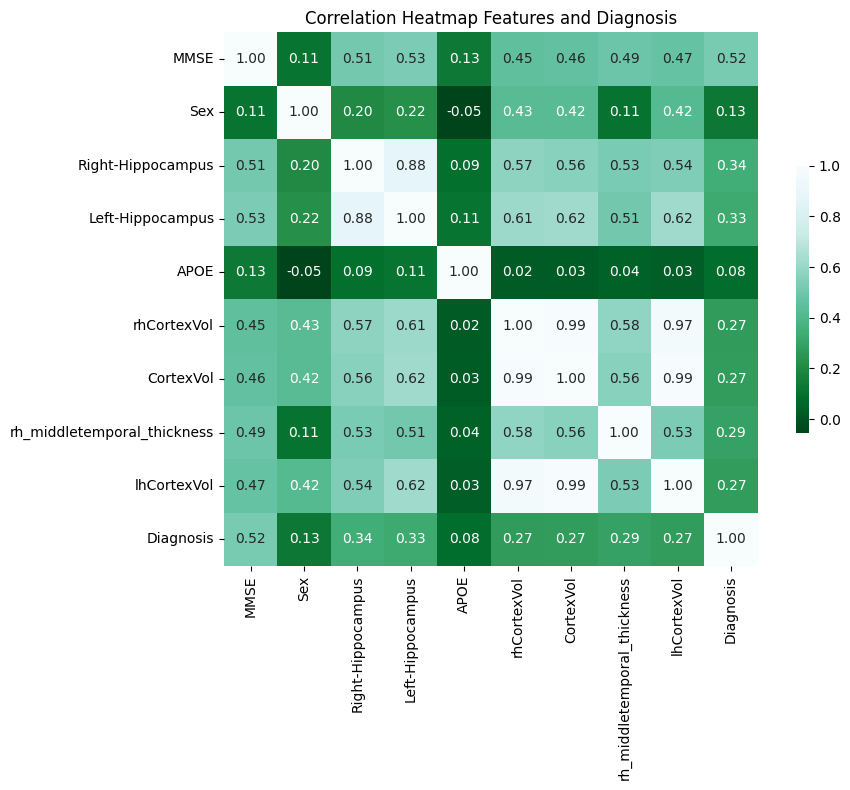

In [280]:
cols = ['MMSE', 'Sex','Right-Hippocampus', 'Left-Hippocampus','APOE', 'rhCortexVol', 'CortexVol', 'rh_middletemporal_thickness', 'lhCortexVol', 'Diagnosis']
pc_data = data[cols]

# Calculating the correlation matrix
corr_matrix = pc_data.corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='BuGn_r', cbar_kws={'shrink': .5}, square=True)
plt.title('Correlation Heatmap Features and Diagnosis')
plt.tight_layout()
plt.show()

#### Feature Importance

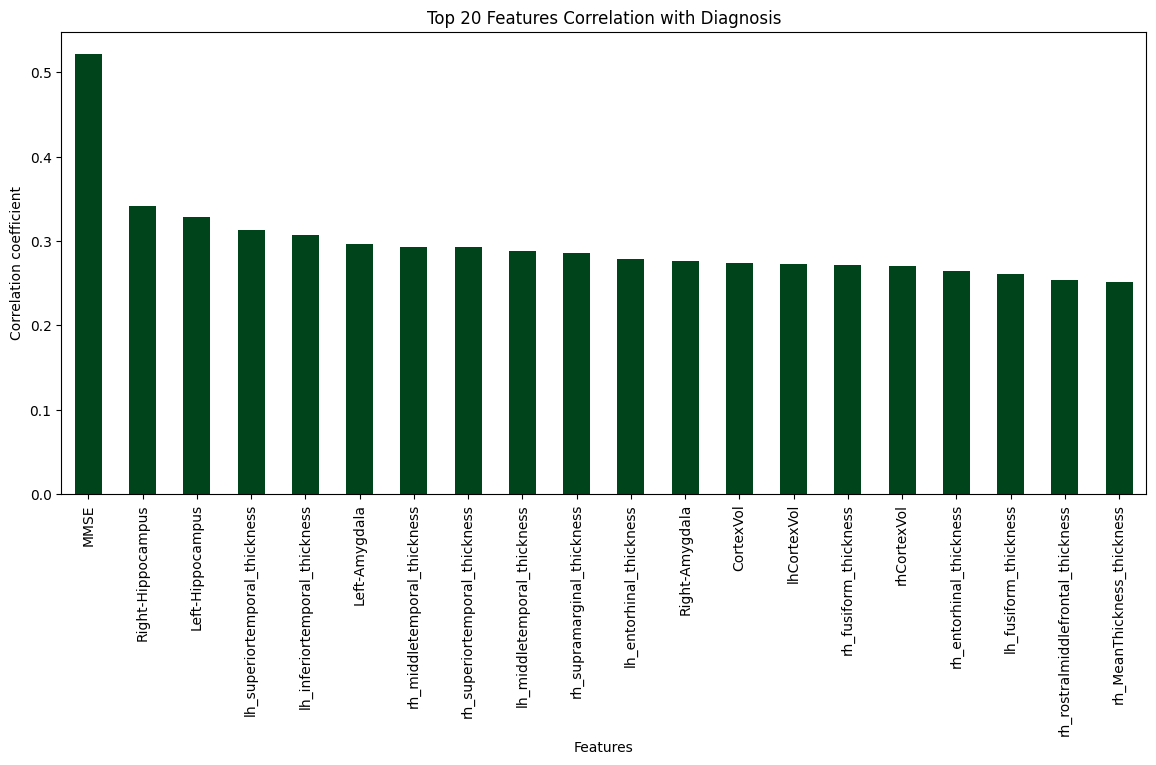

In [281]:
numeric_features = data.select_dtypes(include=[np.number])

# We also need to remove any potential infinity or NaN values as these will cause errors during feature selection.
# numeric_features = numeric_features.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
numeric_features = numeric_features.replace([np.inf, -np.inf], np.nan)
# Calculate the correlation of each feature with the target variable 'Diagnosis'
correlations = numeric_features.corrwith(numeric_features['Diagnosis']).sort_values(ascending=False)

# Remove the 'Diagnosis' correlation with itself
correlations = correlations.drop('Diagnosis', axis=0)

# Selecting top features based on correlation (we can choose a threshold or top N features)
# For this example, let's select the top 20 features
top_features_by_correlation = correlations.head(20)

# Now let's visualize these top features with their correlation values
top_features_by_correlation.plot(kind='bar', figsize=(14, 6), colormap='BuGn_r')
plt.title('Top 20 Features Correlation with Diagnosis')
plt.ylabel('Correlation coefficient')
plt.xlabel('Features')
plt.show()


In [282]:
print(data.shape)
print(data.isna().sum())
data.head()

(1009, 147)
Key                              0
Visit                            0
Site                             0
Diagnosis                        0
Sex                              0
                                ..
lhSurfaceHoles                   0
rhSurfaceHoles                   0
SurfaceHoles                     0
EstimatedTotalIntraCranialVol    0
Subject_ID                       0
Length: 147, dtype: int64


,Key,Visit,Site,Diagnosis,Sex,Age,APOE,MMSE,lh_bankssts_thickness,rh_bankssts_thickness,...,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol,Subject_ID
0,KPOADC001_1,0,0,0,0,86.0,0,20.0,2.224,2.249,...,760261.7818,757058.0,1361906.0,0.664587,0.977432,24.0,13.0,37.0,1393350.752,KPOADC001
1,KPOADC001_2,1,0,0,0,86.0,0,16.0,2.140,2.092,...,759630.3006,756220.0,1319352.0,0.659338,0.941138,23.0,17.0,40.0,1401868.831,KPOADC001
2,KPOADC001_5,2,0,0,0,87.0,0,21.0,2.248,2.343,...,756965.4707,753356.0,1342921.0,0.660968,0.959201,30.0,24.0,54.0,1400041.258,KPOADC001
3,KPOADC002_1,0,0,0,0,68.0,0,26.0,1.971,2.018,...,826027.5631,824742.0,1515148.0,0.652202,0.976865,22.0,21.0,43.0,1551030.924,KPOADC002
4,KPOADC002_2,1,0,0,0,68.0,0,25.0,2.066,2.112,...,814547.9697,813231.0,1508917.0,0.643059,0.968317,20.0,9.0,29.0,1558288.189,KPOADC002


In [283]:
data['Diagnosis'].value_counts()

0    344
1    334
2    331
Name: Diagnosis, dtype: int64

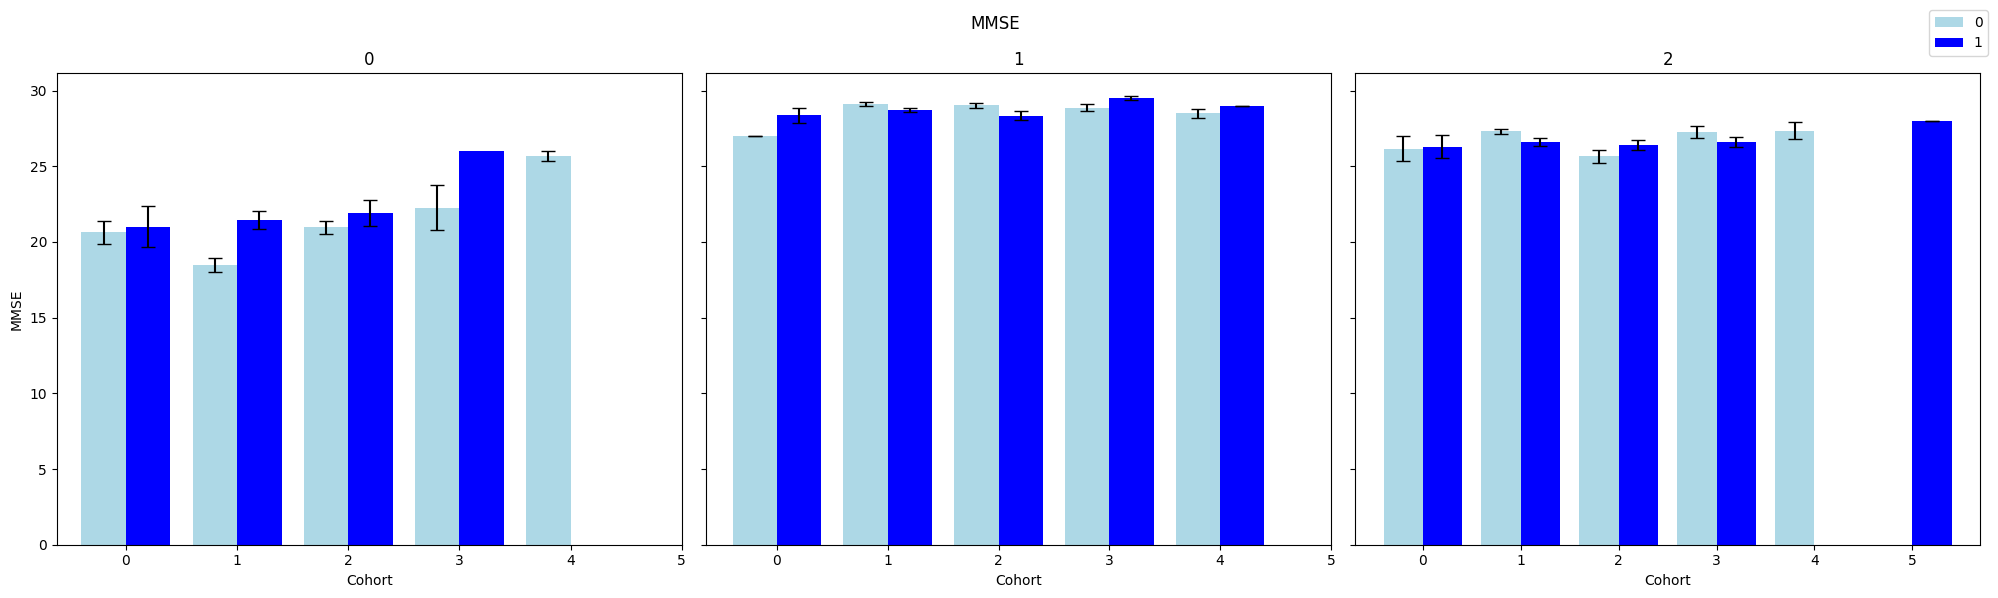

In [284]:
import matplotlib.pyplot as plt

# Unique identifiers for each category
stages = data['Diagnosis'].unique()
cohorts = data['APOE'].unique()
assignments = data['Sex'].unique()
metric = 'MMSE'

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, len(stages), figsize=(20, 6), sharey=True)

# Colors for the assignments
colors = ['lightblue', 'blue']

# Create the plots for each stage, including error bars for standard deviation
for i, stage in enumerate(stages):
    ax = axes[i]
    
    # Data for this stage
    stage_data = data[data['Diagnosis'] == stage]
    
    # Variables to track the position of bars for each cohort
    cohort_positions = np.arange(len(cohorts))
    
    # Plot data for each cohort and assignment
    for j, cohort in enumerate(cohorts):
        for k, assignment in enumerate(assignments):
            # Filter data for this combination of stage, cohort, and assignment
            subset = stage_data[(stage_data['APOE'] == cohort) & (stage_data['Sex'] == assignment)]
            if len(subset)>0:
            # Mean accuracy for this cohort and assignment at the current stage
                mean_accuracy = subset[metric].mean()
                std_error = subset['MMSE'].std() / np.sqrt(len(subset))  # Standard error
                # Determine position for the bar
                bar_position = cohort_positions[j] - 0.2 + k * 0.4
                # Plot the bar
                ax.bar(bar_position, mean_accuracy, yerr=std_error, capsize=5, width=0.4, color=colors[k], label=f'{assignment}' if (i == j == 0) else "")
    
    # Set the labels and titles
    ax.set_xticks(cohort_positions)
    ax.set_xticklabels(cohorts)
    ax.set_title(stage)
    ax.set_xlabel('Cohort')
    if i == 0:
        ax.set_ylabel(metric)

# Add a legend outside the last subplot
handles, labels = axes[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc='upper right', bbox_to_anchor=(1, 1))
fig.suptitle(metric)

plt.tight_layout()
plt.show()

In [287]:
#save the data
data.to_csv('../data/MRI_data_1.csv', index=False)